<a href="https://colab.research.google.com/github/Psousace/Diversos/blob/main/Treinamento_Felipe_Lobato_2_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Felipe Lobato
### RENDIMENTO de RENDA FIXA com taxa VARIÁVEL e COM APORTES
### LINK VIDEO: https://www.youtube.com/watch?v=f6tcfWjJaFA&t=1485s


In [ ]:
import requests
import pandas as pd
import numpy as np
import datetime

In [ ]:
final_date = datetime.datetime.now()
init_date = final_date - datetime.timedelta(days = 360 * 10)

In [ ]:
final_date = final_date.strftime('%d/%m/%y')
init_date = init_date.strftime('%d/%m/%y')

In [ ]:
init_date

'15/10/13'

In [ ]:
df = pd.DataFrame(index = pd.date_range(start= init_date, end= final_date, freq = 'M'))
df.index.name = 'Data'
df

""
Data
2013-10-31
2013-11-30
2013-12-31
2014-01-31
2014-02-28
...
2023-03-31
2023-04-30
2023-05-31


In [ ]:
df['Aporte'] = 1000

In [ ]:
df['Aporte'][:int(len(df)/2)] = 1000
df['Aporte'][int(len(df)/2):] = 5000

In [ ]:
df['Acum.Aporte'] = df['Aporte'].cumsum()
df.head()

,Aporte,Acum.Aporte
Data,,
2013-10-31,1000,1000
2013-11-30,1000,2000
2013-12-31,1000,3000
2014-01-31,1000,4000
2014-02-28,1000,5000


In [ ]:
response = requests.get(f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial={init_date}&dataFinal={final_date}')
response

<Response [200]>

In [ ]:
selic_df = pd.DataFrame(response.json())
selic_df['Data'] = pd.to_datetime(selic_df['data'], infer_datetime_format= True)

selic_df = selic_df.set_index('Data').drop(columns = ['data'])
selic_df = selic_df.rename(columns = {'valor':'Selic'})
selic_df['Selic'] = pd.to_numeric(selic_df['Selic'], errors = 'raise')

selic_df.head()

,Selic
Data,
2013-10-15,0.035657
2013-10-16,0.035657
2013-10-17,0.035657
2013-10-18,0.035657
2013-10-21,0.035657


https://pandas.pydata.org/docs/user_guide/timeseries.html?highlight=offset%20aliases

In [ ]:
df = df.resample('B').ffill()

In [ ]:
df
final_df = pd.merge(df, right = selic_df, left_index = True, right_index=True)
final_df

,Aporte,Acum.Aporte,Selic
Data,,,
2013-10-31,1000,1000,0.035657
2013-11-01,1000,1000,0.035657
2013-11-04,1000,1000,0.035657
2013-11-05,1000,1000,0.035657
2013-11-06,1000,1000,0.035657
...,...,...,...
2023-07-25,5000,349000,0.050788
2023-07-26,5000,349000,0.050788
2023-07-27,5000,349000,0.050788


In [ ]:
final_df.dropna(how = 'any', inplace = True)
final_df

,Aporte,Acum.Aporte,Selic
Data,,,
2013-10-31,1000,1000,0.035657
2013-11-01,1000,1000,0.035657
2013-11-04,1000,1000,0.035657
2013-11-05,1000,1000,0.035657
2013-11-06,1000,1000,0.035657
...,...,...,...
2023-07-25,5000,349000,0.050788
2023-07-26,5000,349000,0.050788
2023-07-27,5000,349000,0.050788


In [ ]:
final_df['Acumu. Selic'] = (final_df['Selic']/100 + 1).cumprod()
final_df

,Aporte,Acum.Aporte,Selic,Acumu. Selic
Data,,,,
2013-10-31,1000,1000,0.035657,1.000357
2013-11-01,1000,1000,0.035657,1.000713
2013-11-04,1000,1000,0.035657,1.001070
2013-11-05,1000,1000,0.035657,1.001427
2013-11-06,1000,1000,0.035657,1.001784
...,...,...,...,...
2023-07-25,5000,349000,0.050788,2.336181
2023-07-26,5000,349000,0.050788,2.337368
2023-07-27,5000,349000,0.050788,2.338555


In [ ]:
final_df['Pat. Acum.'] = final_df['Acumu. Selic'] * final_df['Acum.Aporte']
final_df.head()

,Aporte,Acum.Aporte,Selic,Acumu. Selic,Pat. Acum.
Data,,,,,
2013-10-31,1000,1000,0.035657,1.000357,1000.356570
2013-11-01,1000,1000,0.035657,1.000713,1000.713267
2013-11-04,1000,1000,0.035657,1.001070,1001.070091
2013-11-05,1000,1000,0.035657,1.001427,1001.427043
2013-11-06,1000,1000,0.035657,1.001784,1001.784122


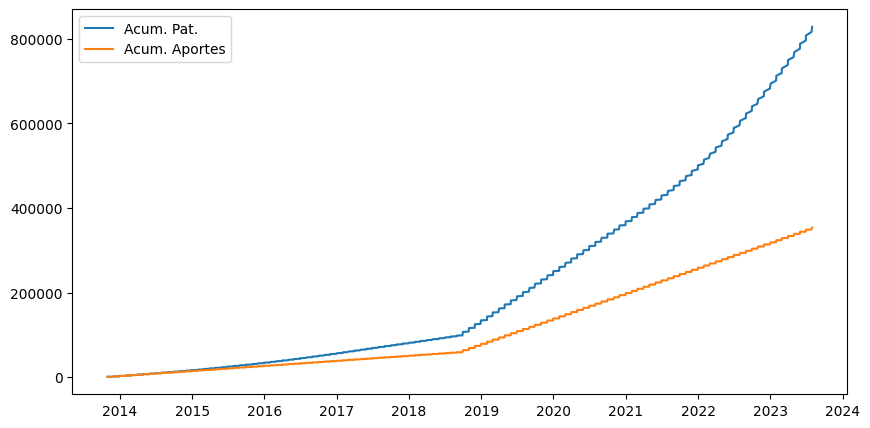

In [ ]:
from pandas.io.formats.style import plt
fig = plt.figure(figsize=(10,5))
plt.plot(final_df['Pat. Acum.'], label = 'Acum. Pat.')
plt.plot(final_df['Acum.Aporte'], label = 'Acum. Aportes')
plt.legend()
plt.show()

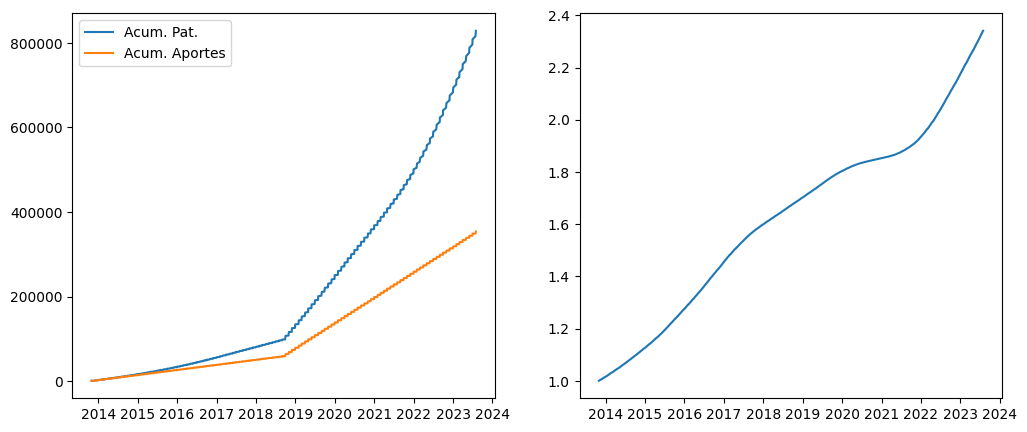

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(final_df['Pat. Acum.'], label = 'Acum. Pat.')
ax[0].plot(final_df['Acum.Aporte'], label = 'Acum. Aportes')
ax[0].legend()

ax[1].plot(final_df['Acumu. Selic'])
plt.show()